# Package Management

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.impute import SimpleImputer
import warnings
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings('ignore')


# Data Preprocessing

## Load Data

In [3]:

file_path = r"C:\Users\samma\PycharmProjects\jn_ta\data\train\cs-training.xlsx"
sheet_name = "cs-training"
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [4]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

## Data Types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [7]:
# check for missing values in the data
data.isnull().sum()


SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

## Handling Missing Values

In [8]:

data.NumberOfDependents.agg(['mode'])

,mode
0,0.0


In [9]:
data['NumberOfDependents'].fillna(0, inplace=True)

In [10]:
data["MonthlyIncome"].agg(['mean', 'median', 'max', 'min'])

mean      6.670221e+03
median    5.400000e+03
max       3.008750e+06
min       0.000000e+00
Name: MonthlyIncome, dtype: float64

In [11]:
data['MonthlyIncome'].fillna(data['MonthlyIncome'].median(), inplace=True)

In [12]:
data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [13]:
# Check for duplicates
duplicates = data.duplicated()
print("Number of duplicate rows = ", duplicates.sum())

Number of duplicate rows =  767


In [14]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [15]:
data.shape

(149233, 11)

# Exploratory Data Analysis


## Data Description

In [16]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149233.000000,149233.000000,149233.000000,149233.000000,149233.000000,1.492330e+05,149233.000000,149233.000000,149233.000000,149233.000000,149233.000000
mean,0.067036,6.077045,52.298145,0.388386,354.808254,6.426774e+03,8.488082,0.232435,1.023473,0.206811,0.741177
std,0.250085,250.396053,14.714050,3.779712,2042.891693,1.292246e+04,5.134233,3.752133,1.130304,3.736132,1.108596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030210,41.000000,0.000000,0.178098,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154285,52.000000,0.000000,0.368578,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.555959,63.000000,0.000000,0.877090,7.409000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [17]:
data.RevolvingUtilizationOfUnsecuredLines.describe()

count    149233.000000
mean          6.077045
std         250.396053
min           0.000000
25%           0.030210
50%           0.154285
75%           0.555959
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [18]:
data['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.093977
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [19]:
(data[data['RevolvingUtilizationOfUnsecuredLines'] > 10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7602.103734,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5726.519076,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5400.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [20]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    filtered_df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

    return filtered_df


## Data Visualization

## Univariate Analysis

### Age Distribution

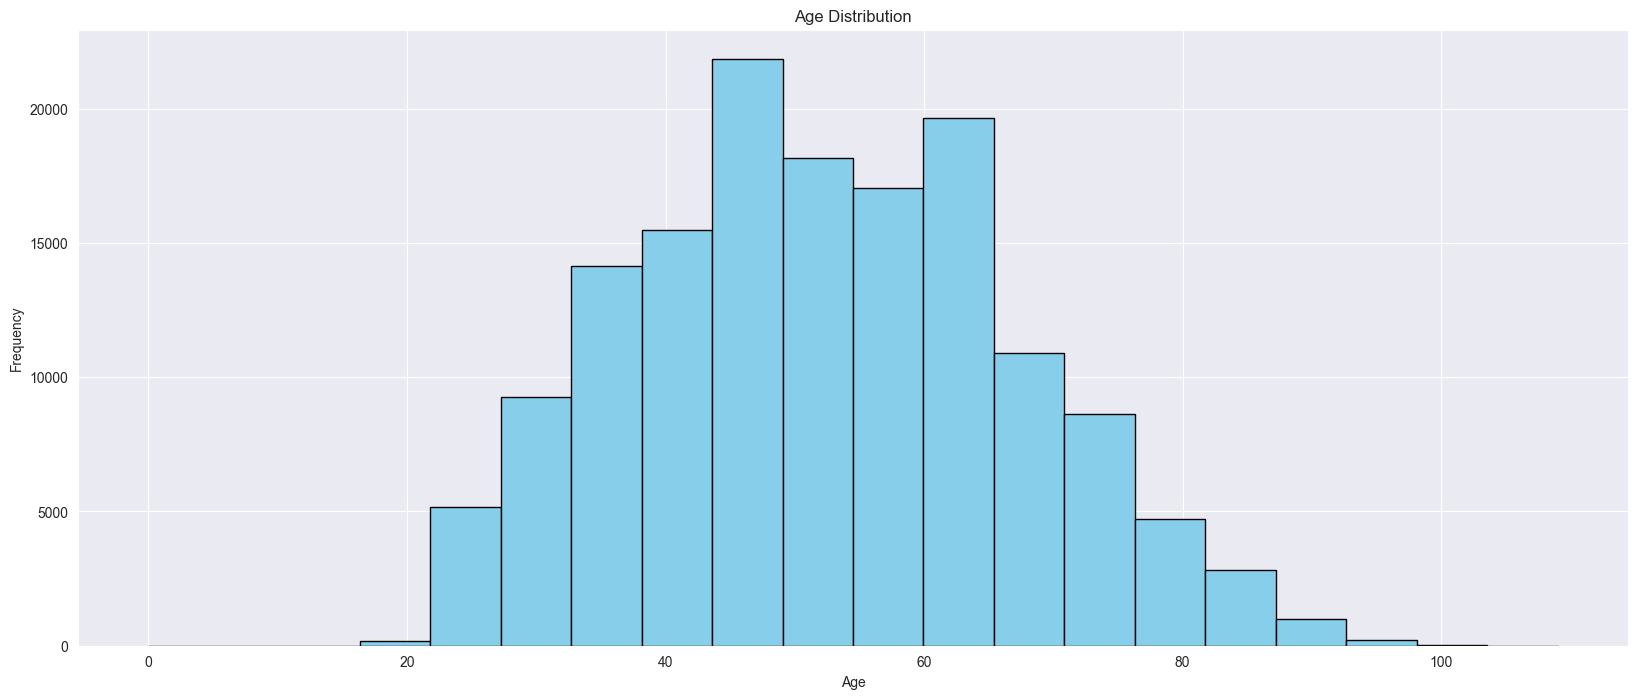

In [21]:

# Create a new figure
plt.figure(figsize=(20,8))

# Plot histogram of 'age'
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


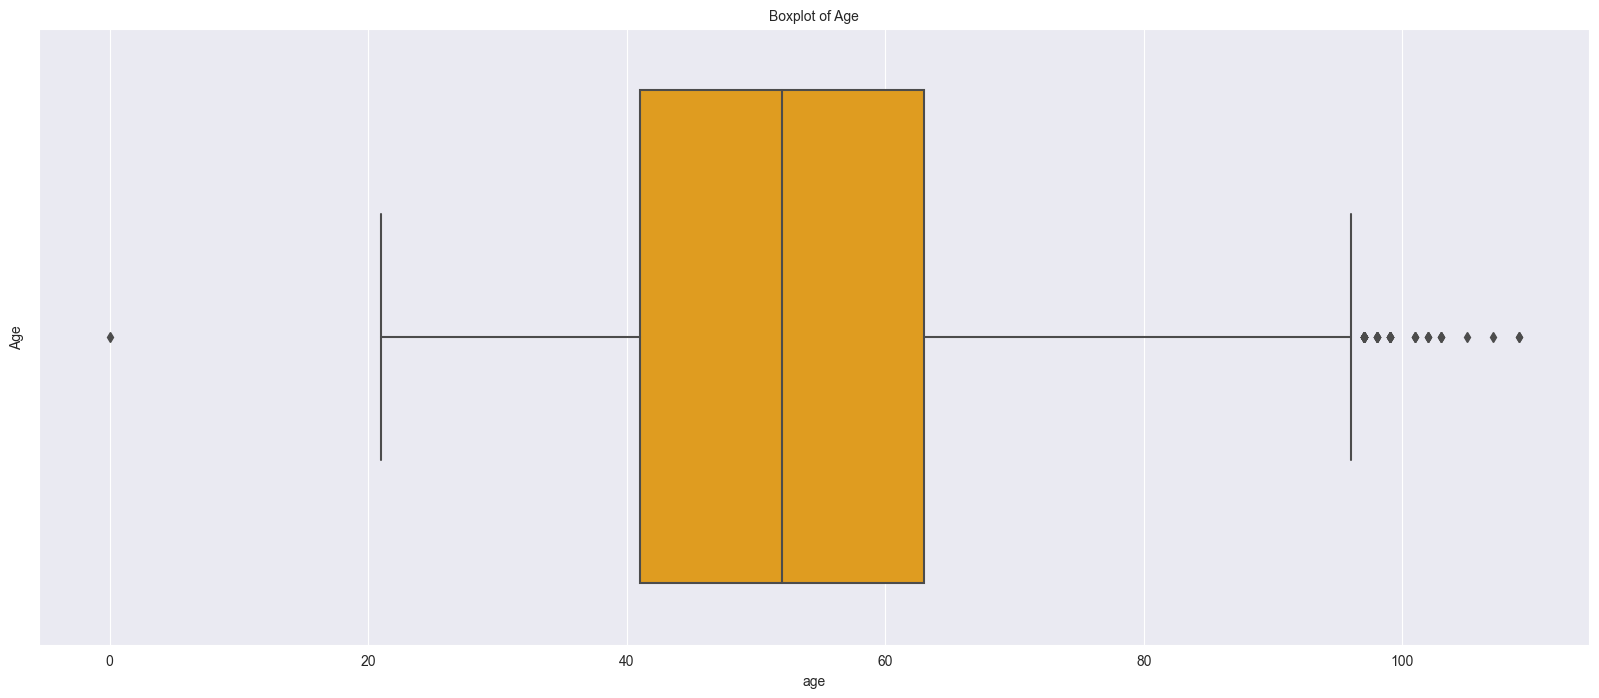

In [22]:
# Create a boxplot for 'age'
plt.figure(figsize=(20,8))
sns.boxplot(x=data['age'], orient='h', color='orange')
plt.ylabel('Age', fontsize=10)
plt.title('Boxplot of Age', fontsize=10)
plt.show()


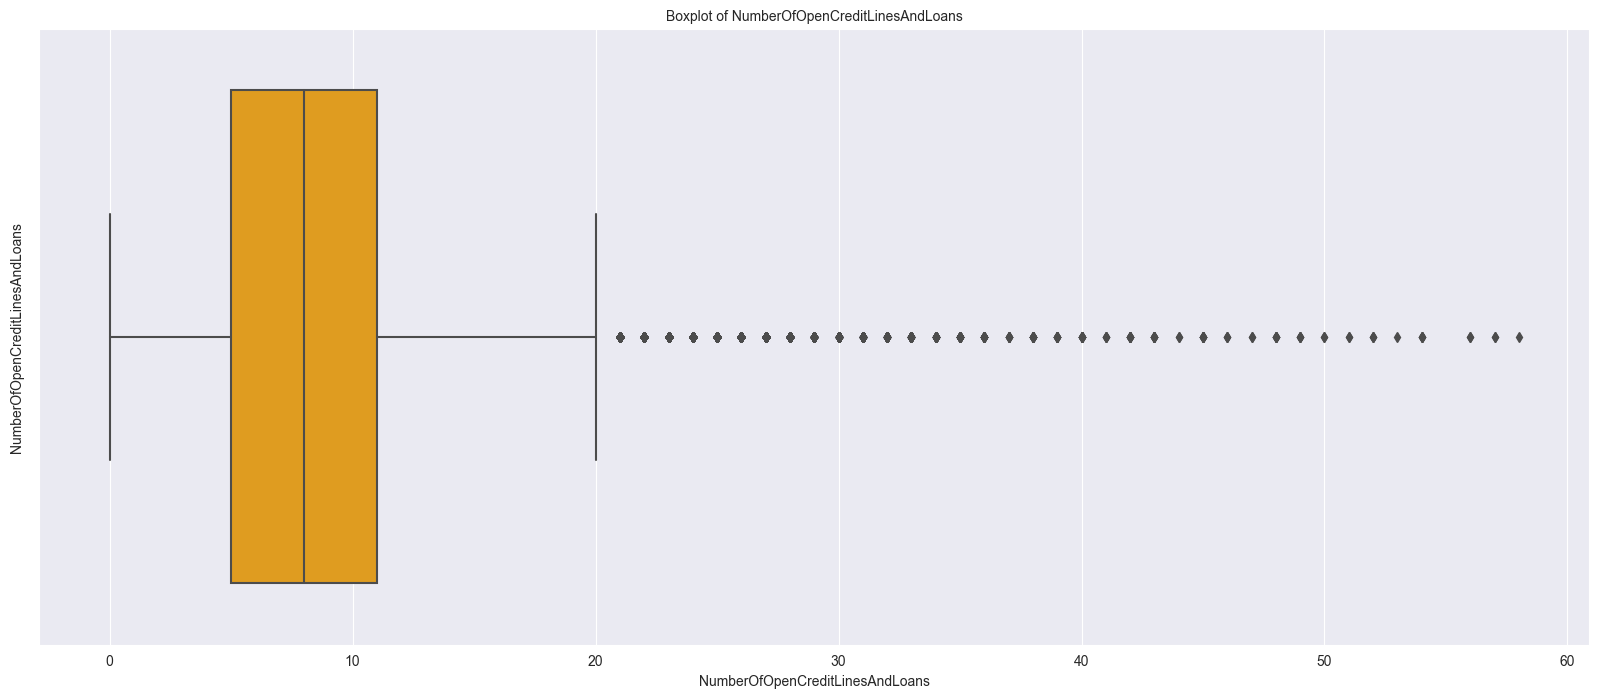

In [23]:
# Create a boxplot for 'age'
plt.figure(figsize=(20,8))
sns.boxplot(x=data['NumberOfOpenCreditLinesAndLoans'], orient='h', color='orange')
plt.ylabel('NumberOfOpenCreditLinesAndLoans', fontsize=10)
plt.title('Boxplot of NumberOfOpenCreditLinesAndLoans', fontsize=10)
plt.show()

### Number of Open Credit lines and Loans Distribution

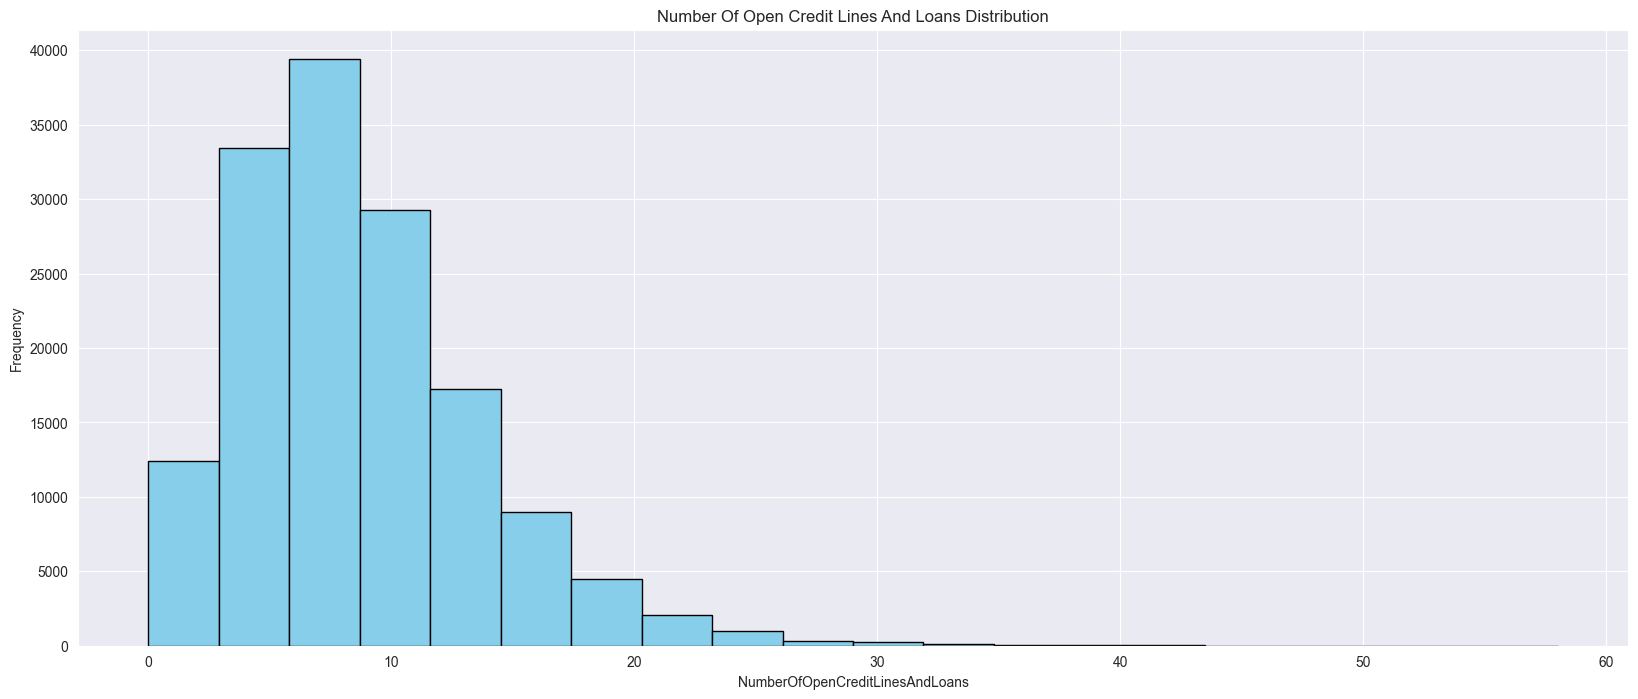

In [25]:

# Create a new figure
plt.figure(figsize=(20,8))

# Plot histogram of 'age'
plt.hist(data['NumberOfOpenCreditLinesAndLoans'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number Of Open Credit Lines And Loans Distribution')
plt.xlabel('NumberOfOpenCreditLinesAndLoans')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### Number of Dependents Distribution

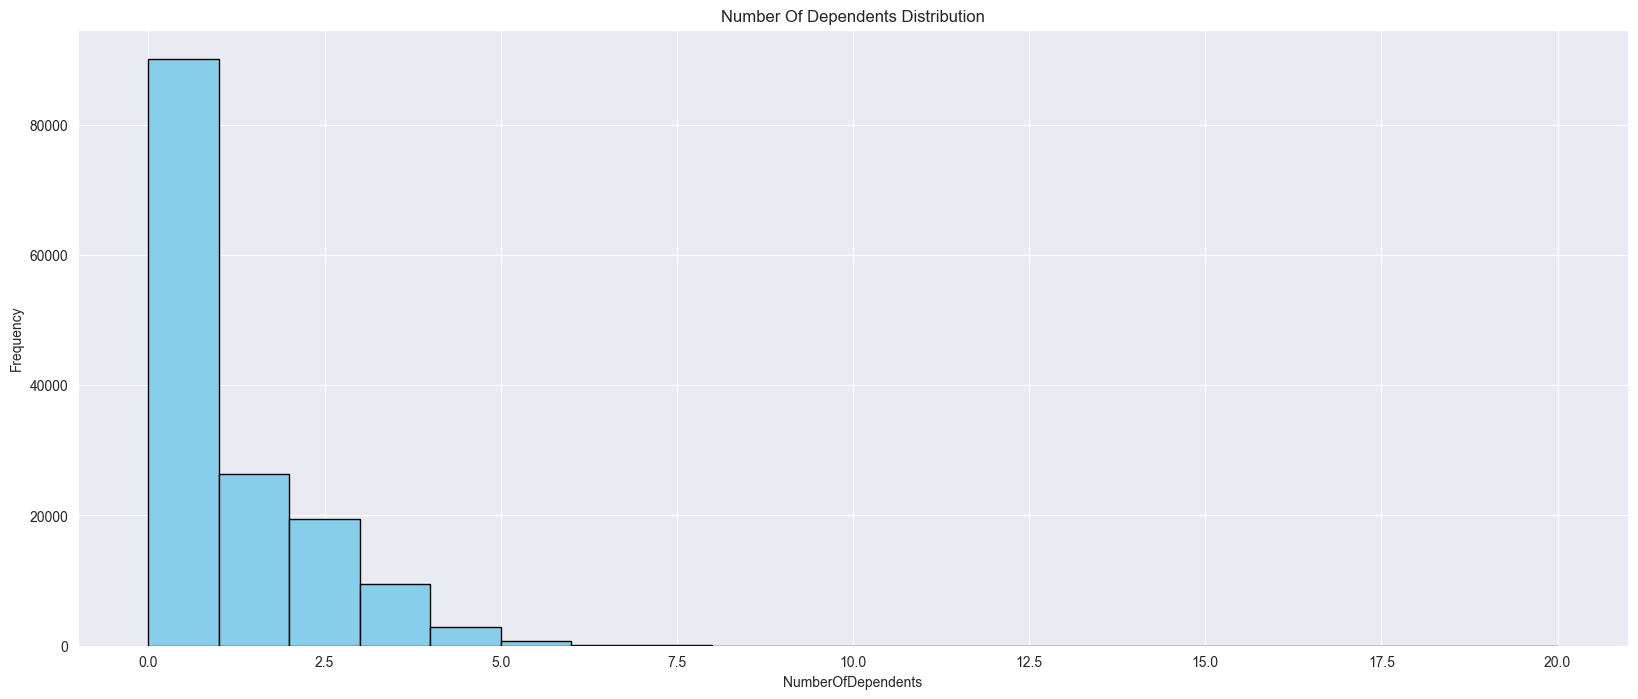

In [26]:

# Create a new figure
plt.figure(figsize=(20,8))

# Plot histogram of 'age'
plt.hist(data['NumberOfDependents'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number Of Dependents Distribution')
plt.xlabel('NumberOfDependents')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### Count of Serious Delinquency in 2 years

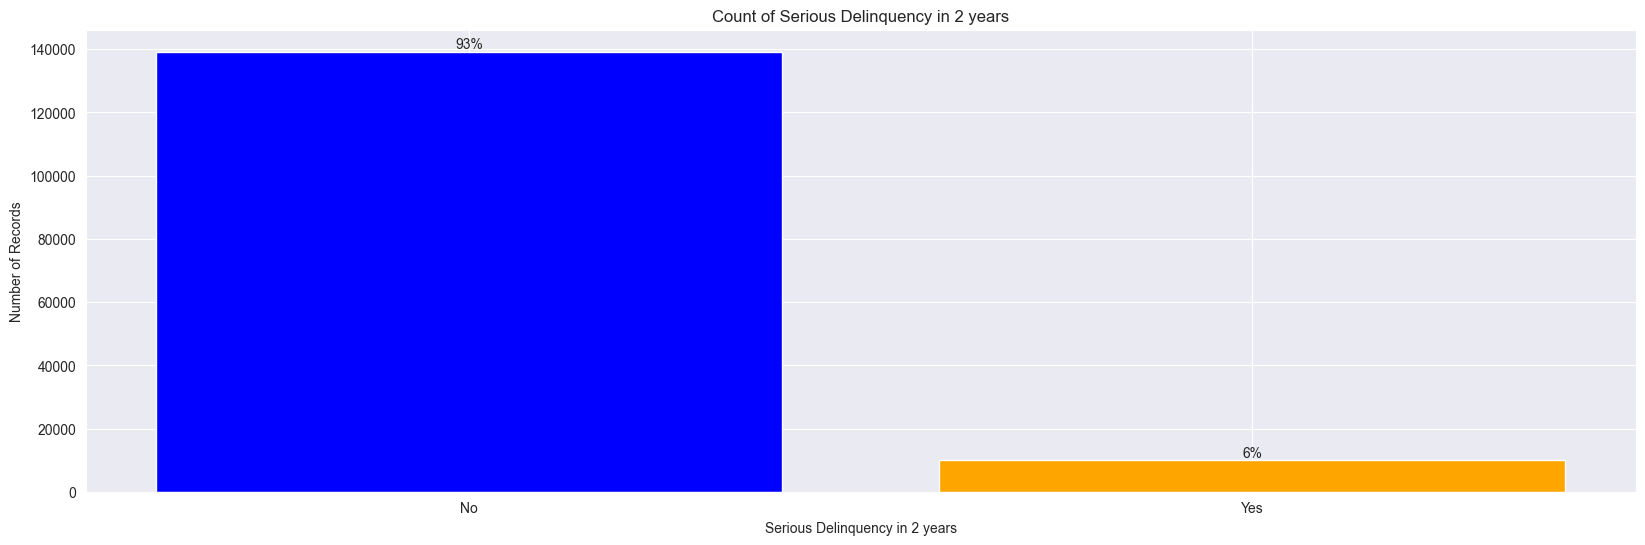

In [27]:

# Count the unique values in the 'SeriousDlqin2yrs' column
counts = data['SeriousDlqin2yrs'].value_counts()

# Calculate the percentage for each unique value
percentage = counts / data['SeriousDlqin2yrs'].count() * 100

# Plot the counts as a bar graph
plt.figure(figsize=(20,6))
bars = plt.bar(counts.index, counts.values, color=['blue', 'orange'])
plt.xlabel('Serious Delinquency in 2 years')
plt.ylabel('Number of Records')
plt.title('Count of Serious Delinquency in 2 years')
plt.xticks(counts.index, ['No', 'Yes'])

# Add the percentage on top of each bar
for i in range(len(bars)):
    yvalue = bars[i].get_height()
    plt.text(bars[i].get_x() + bars[i].get_width()/2, yvalue, '%d%%' % percentage[i], ha='center', va='bottom')

plt.show()


## Multivariate Analysis

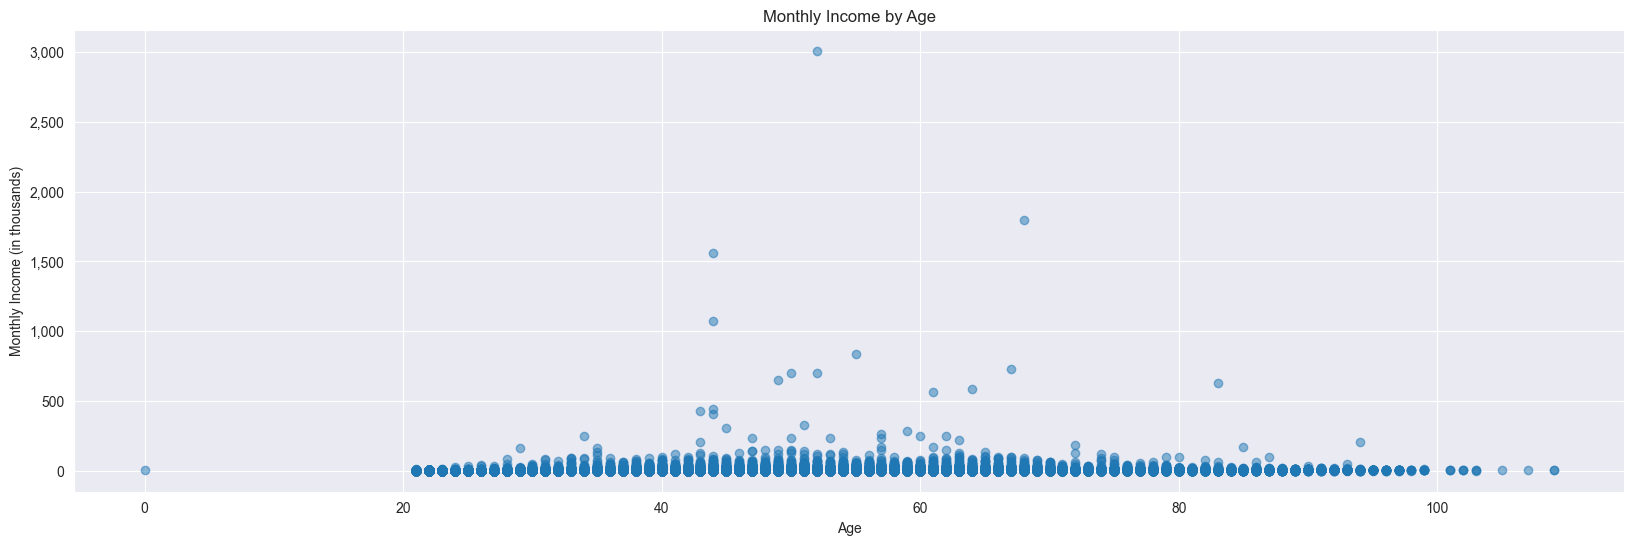

In [28]:
# Scatterplot of 'MonthlyIncome' and 'age'
plt.figure(figsize=(20,6))
plt.scatter(data['age'], data['MonthlyIncome']/1000, alpha=0.5)  # Divide by 1000 to represent income in thousands
plt.xlabel('Age')
plt.ylabel('Monthly Income (in thousands)')
plt.title('Monthly Income by Age')

# Format y-axis to display in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### Monthly Income by Serious Delinquency in 2 years

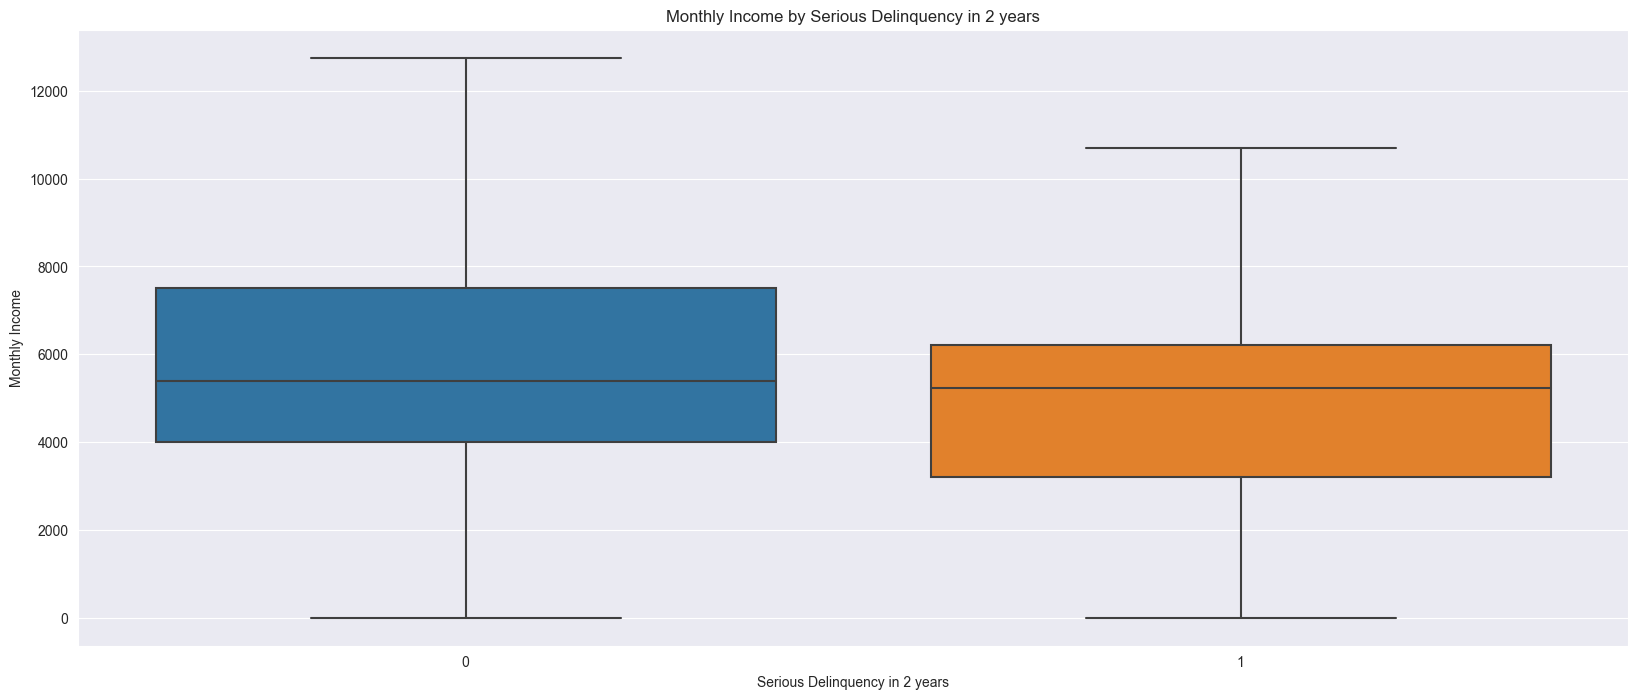

In [29]:
# Create a Grouped  boxplot
plt.figure(figsize=(20,8))
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=data, showfliers=False)

plt.xlabel('Serious Delinquency in 2 years')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Serious Delinquency in 2 years')
plt.show()

### Age by Serious Delinquency in 2 years

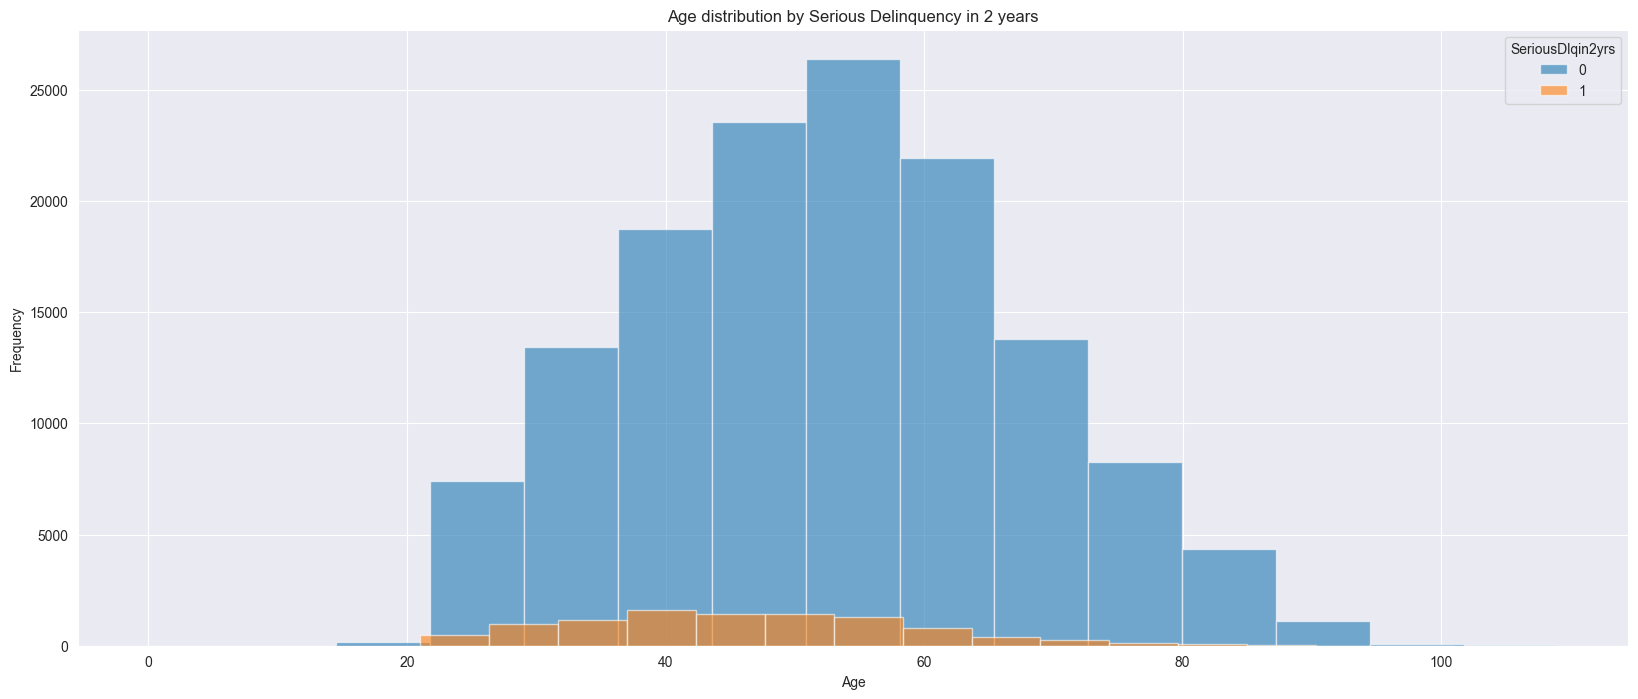

In [30]:
fig, ax = plt.subplots(figsize=(20,8))

for label, group in data.groupby('SeriousDlqin2yrs'):
    group['age'].hist(alpha=0.6, ax=ax, label=label, bins=15)

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age distribution by Serious Delinquency in 2 years')
plt.legend(title='SeriousDlqin2yrs')
plt.show()

### Correlation Matrix

In [31]:
corr_matrix = data.corr()
corr_matrix.round(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.00,-0.00,-0.12,0.13,-0.01,-0.02,-0.03,0.12,-0.01,0.11,0.05
RevolvingUtilizationOfUnsecuredLines,-0.00,1.00,-0.01,-0.00,0.00,0.01,-0.01,-0.00,0.01,-0.00,0.00
age,-0.12,-0.01,1.00,-0.05,0.02,0.03,0.15,-0.05,0.03,-0.05,-0.22
NumberOfTime30-59DaysPastDueNotWorse,0.13,-0.00,-0.05,1.00,-0.01,-0.01,-0.05,0.98,-0.03,0.98,0.00
DebtRatio,-0.01,0.00,0.02,-0.01,1.00,-0.02,0.05,-0.01,0.12,-0.01,-0.05
MonthlyIncome,-0.02,0.01,0.03,-0.01,-0.02,1.00,0.09,-0.01,0.12,-0.01,0.07
NumberOfOpenCreditLinesAndLoans,-0.03,-0.01,0.15,-0.05,0.05,0.09,1.00,-0.07,0.43,-0.06,0.07
NumberOfTimes90DaysLate,0.12,-0.00,-0.05,0.98,-0.01,-0.01,-0.07,1.00,-0.04,0.99,-0.01
NumberRealEstateLoansOrLines,-0.01,0.01,0.03,-0.03,0.12,0.12,0.43,-0.04,1.00,-0.04,0.13
NumberOfTime60-89DaysPastDueNotWorse,0.11,-0.00,-0.05,0.98,-0.01,-0.01,-0.06,0.99,-0.04,1.00,-0.01


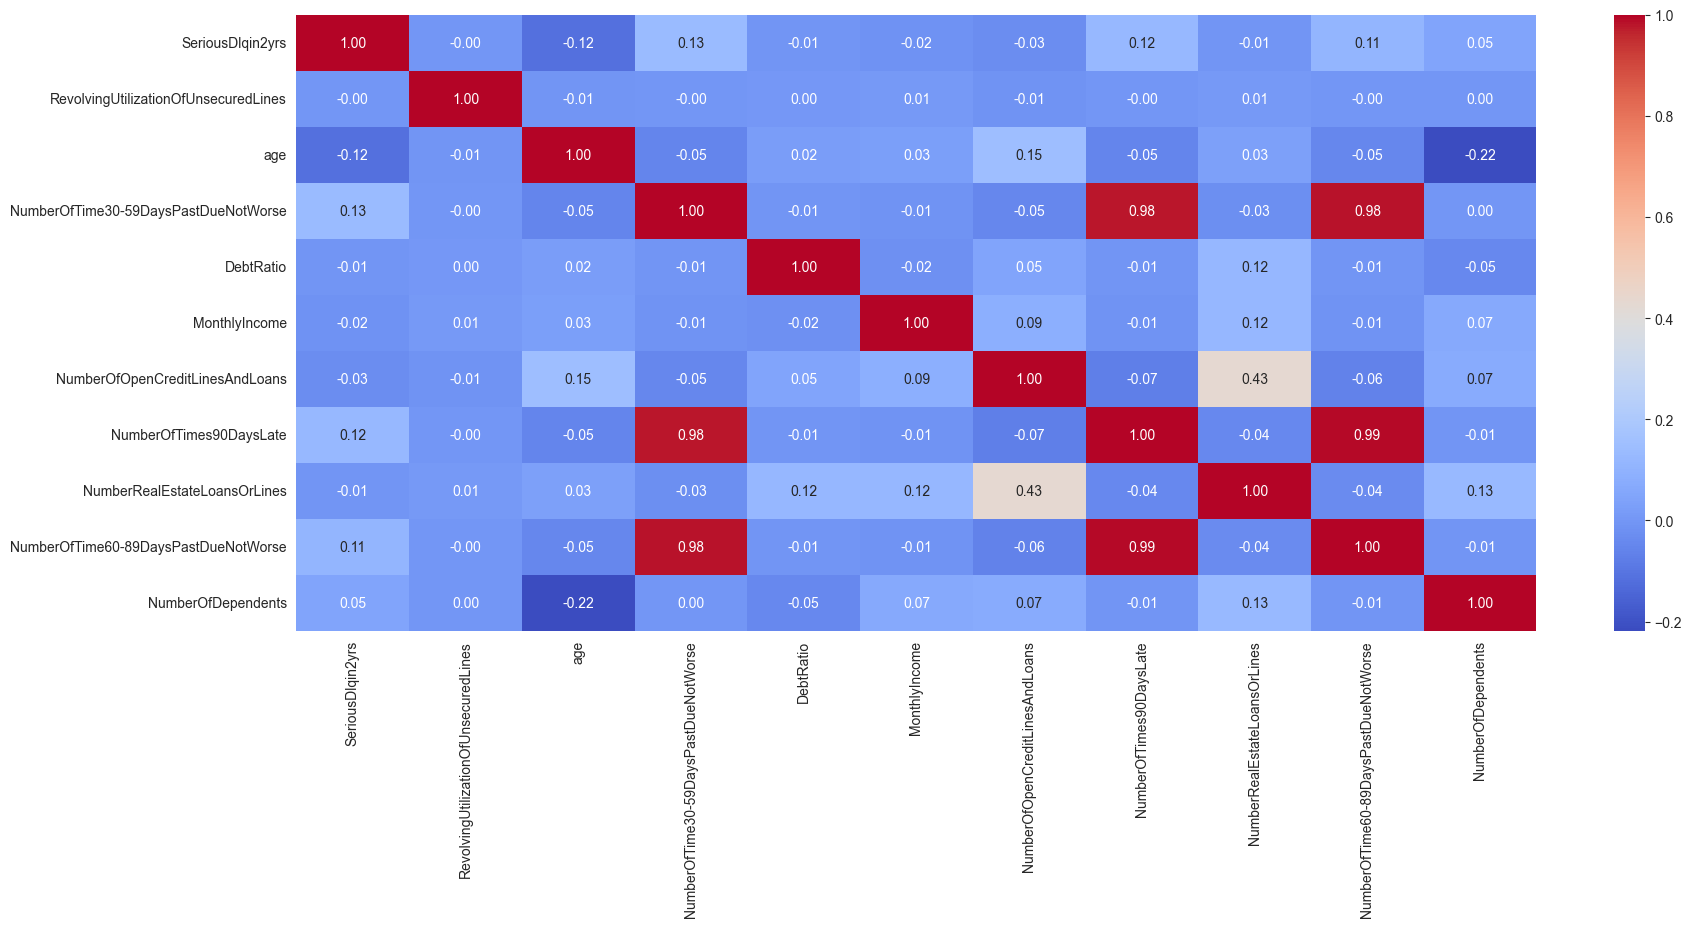

In [32]:
plt.figure(figsize=(20,8))  # Size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', )  # Heatmap

plt.show()

# Model Building


In [33]:
model = XGBClassifier(tree_method = 'exact')


In [34]:
x = data.drop(['SeriousDlqin2yrs'],axis=1)
y = data['SeriousDlqin2yrs']

In [35]:
model.fit(x,y.values.ravel())
y_pred = model.predict(x)

In [36]:
accuracy_score(y,y_pred)

0.9464863669563702

In [37]:
cm = confusion_matrix(y,y_pred)
cm

array([[138441,    788],
       [  7198,   2806]], dtype=int64)

Text(50.722222222222214, 0.5, 'actuals')

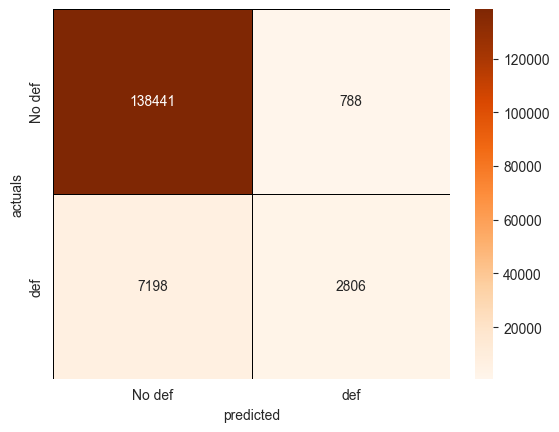

In [38]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [39]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    139229
           1       0.78      0.28      0.41     10004

    accuracy                           0.95    149233
   macro avg       0.87      0.64      0.69    149233
weighted avg       0.94      0.95      0.93    149233



# Hyperparameter Tuning

In [40]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
x = data.drop(['SeriousDlqin2yrs'],axis=1)
y = data['SeriousDlqin2yrs']


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
# Define the model
model = XGBClassifier(tree_method = 'exact')

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200]
}

# Setup the grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')

# Conduct the grid search
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [43]:
# Get the best model
best_model = grid_search.best_estimator_


In [44]:
# Make predictions with the best model
y_pred = best_model.predict(x_test)

In [45]:
# Evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy:  0.9386202968472543
Confusion Matrix: 
 [[27659   237]
 [ 1595   356]]


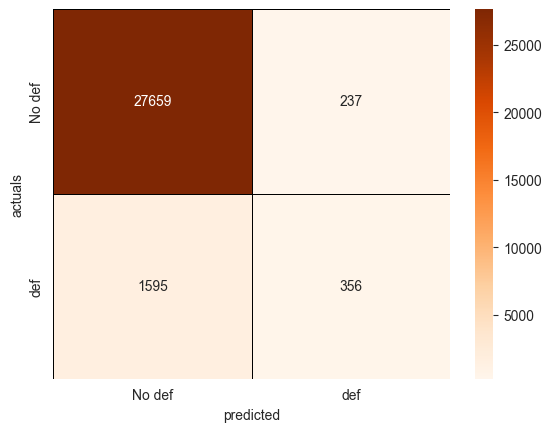

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     27896
           1       0.60      0.18      0.28      1951

    accuracy                           0.94     29847
   macro avg       0.77      0.59      0.62     29847
weighted avg       0.92      0.94      0.92     29847



In [46]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")
plt.show()

print('Classification Report: \n', classification_report(y_test, y_pred))